In [2]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Wczytanie danych

In [3]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dane dot. ceny za bilet - niepuste - jako np.array

In [4]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values # konwersja pd.Series do np.array

Podstawowe statystyki: średnia, mediana, moda

In [5]:
mean_fare = np.round(np.mean(fare_values))
median_fare = np.median(fare_values) # mediana jest odporna na wartości odstające
mode_fare = stats.mode(fare_values,
                      keepdims=False)
print(f'{mean_fare = }')
print(f'{median_fare = }')
print(f'{mode_fare = }')

mean_fare = 32.0
median_fare = 14.4542
mode_fare = ModeResult(mode=8.05, count=43)


Histogram + podstawowe statystyki

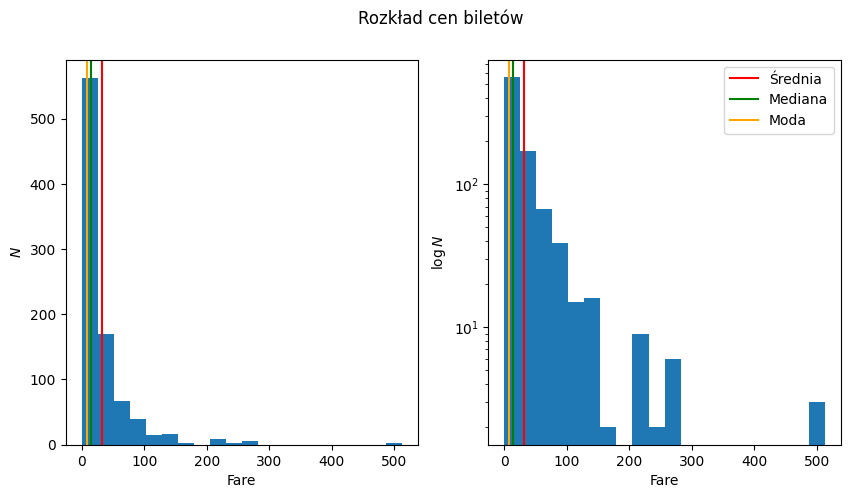

In [19]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
for i in range(2):
    ax[i].hist(fare_values, bins=20)
    ax[i].axvline(x=mean_fare, color='red', label='Średnia', linewidth=1.5)
    ax[i].axvline(x=median_fare, color='green', label='Mediana', linewidth=1.5)
    ax[i].axvline(x=mode_fare[0], color='orange', label='Moda', linewidth=1.5)
    ax[i].set_xlabel('Fare')
ax[1].semilogy()
ax[0].set_ylabel('$N$')
ax[1].set_ylabel('$\log N$')
fig.suptitle('Rozkład cen biletów')
plt.legend(loc='upper right')
plt.show()

Obliczenie kwartyli

In [21]:
q0 = np.quantile(fare_values, q=0.0)
q1 = np.round(np.quantile(fare_values, q=0.25))
q3 = np.round(np.quantile(fare_values, q=0.75))
q4 = np.round(np.quantile(fare_values, q=1.0))

print(f'Q0 = {q0}')
print(f'Q1 = {q1}')
print(f'Q2 = {median_fare}')
print(f'Q3 = {q3}')
print(f'Q4 = {q4}')

Q0 = 0.0
Q1 = 8.0
Q2 = 14.4542
Q3 = 31.0
Q4 = 512.0


Histogram z kwartylami

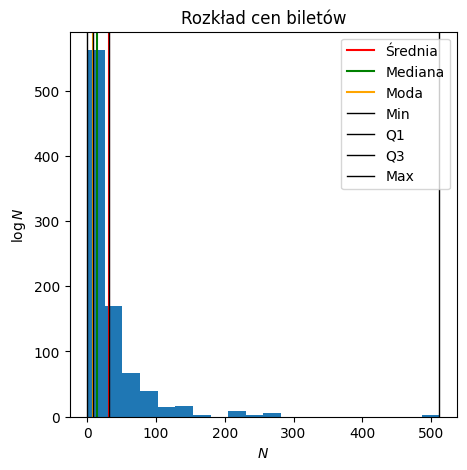

In [44]:
plt.figure(figsize=(5,5))
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare, color='red', label='Średnia', linewidth=1.5)
plt.axvline(x=median_fare, color='green', label='Mediana', linewidth=1.5)
plt.axvline(x=mode_fare[0], color='orange', label='Moda', linewidth=1.5)
plt.axvline(x=q0, color='k', label='Min', linewidth=1.0)
plt.axvline(x=q1, color='k', label='Q1', linewidth=1.0)
plt.axvline(x=q3, color='k', label='Q3', linewidth=1.0)
plt.axvline(x=q4, color='k', label='Max', linewidth=1.0)
plt.legend(loc='upper right')
plt.xlabel('$N$')
plt.ylabel('$\log N$')
plt.title('Rozkład cen biletów')
plt.show()

Obliczenie decyli

In [35]:
deciles0 = np.arange(1,10)/10
deciles = np.array([np.round(np.quantile(fare_values, q=deciles0[j])) for j in range(len(deciles0))])
deciles

array([ 8.,  8.,  8., 10., 14., 22., 27., 40., 78.])

Histogram z naniesionymi decylami

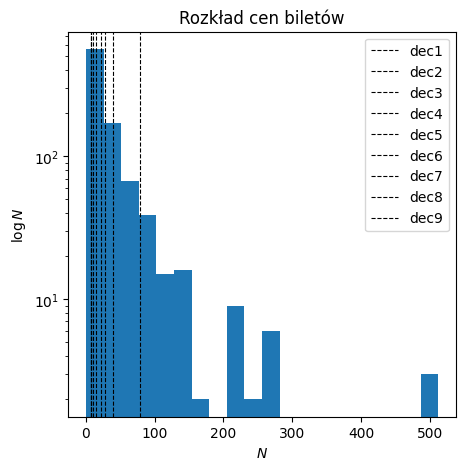

In [45]:
plt.figure(figsize=(5,5))
plt.hist(fare_values, bins=20)
for j in range(np.size(deciles, axis=0)):
    plt.axvline(x=deciles[j], color='k', label=f'dec{j+1}', linewidth=0.8, linestyle='--')
plt.legend(loc='upper right')
plt.semilogy()
plt.xlabel('$N$')
plt.ylabel('$\log N$')
plt.title('Rozkład cen biletów')
plt.show()

In [54]:
range_fare = max(fare_values) - min(fare_values)
range_fare

512.3292

In [55]:
# rozstęp międzykwartylowy
iqr = q3 - q1
iqr

25.0

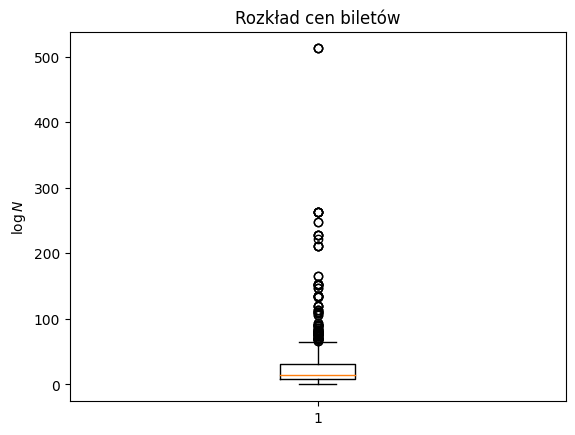

In [48]:
plt.boxplot(fare_values)
# plt.semilogy()
plt.ylabel('$\log N$')
plt.title('Rozkład cen biletów')
plt.show()

In [57]:
variance_fare = np.var(fare_values, ddof=1)
variance_fare

2800.4130996951753

In [58]:
standard_deviation_fare = np.std(fare_values, ddof=1)
standard_deviation_fare

52.91892950254356

In [59]:
stats.skew(fare_values)

4.643848122581354

Standarized Scaler

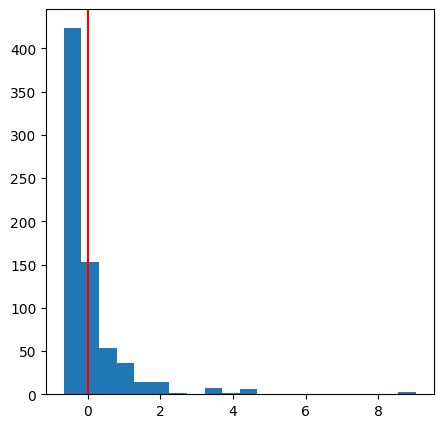

Średnia: -5.970947359328573e-17
Odchylenie standardowe: 1.000701016559981


In [60]:
scaler_standarized = StandardScaler()
standarized_fare_values = scaler_standarized.fit_transform(fare_values.reshape(-1,1))
plt.figure(figsize=(5,5))
plt.hist(standarized_fare_values, bins=20)
plt.axvline(x=standarized_fare_values.mean(), color='red', label='Średnia')
plt.show()
print(f'Średnia: {standarized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standarized_fare_values, ddof=1)}')

Min Max Scaler

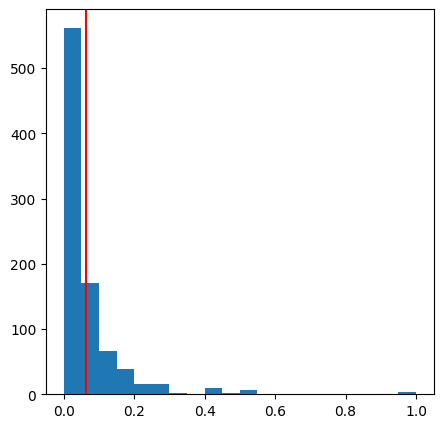

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [49]:
scaler_MinMax = MinMaxScaler()
standarized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1,1))
plt.figure(figsize=(5,5))
plt.hist(standarized_fare_values, bins=20)
plt.axvline(x=standarized_fare_values.mean(), color='red', label='Średnia')
plt.show()
print(f'Średnia: {standarized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standarized_fare_values, ddof=1)}')

#### Korelacja między ceną biletu a wiekiem.
Dla obliczenia korelacji wczytuję jeszcze raz dane

In [76]:
data = dataset.loc[dataset['Fare'].notnull() & dataset['Age'].notnull(), ['Age','Fare']]

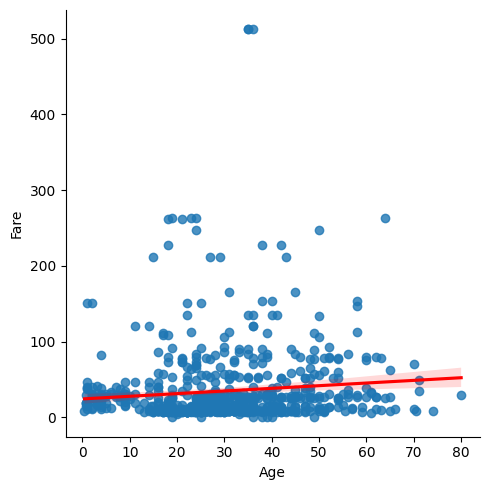

In [77]:
sns.lmplot(x='Age', y='Fare', data = data,
           line_kws={'color': 'red'})
plt.show()

In [79]:
stats.pearsonr(data['Age'],data['Fare'])

PearsonRResult(statistic=0.09606669176903891, pvalue=0.010216277504442105)

Prosta korelacji liniowej jest prawie pozioma, można powiedzieć że **cena biletu i wiek pasażera nie wykazują korelacji**.

In [80]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
dataset.Pclass.unique()

array([3, 1, 2], dtype=int64)

#### Korelacja między klasą a ceną biletu

In [82]:
data = dataset.loc[dataset['Fare'].notnull() & dataset['Pclass'].notnull(), ['Pclass','Fare']]

In [83]:
data.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [85]:
stats.pearsonr(data['Pclass'],data['Fare'])

PearsonRResult(statistic=-0.5494996199439078, pvalue=1.967386173420501e-71)

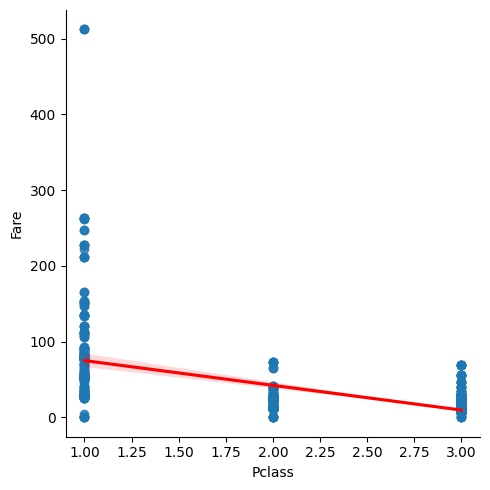

In [89]:
sns.lmplot(x='Pclass', y='Fare', data = data,
           line_kws={'color': 'red'})
plt.show()

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

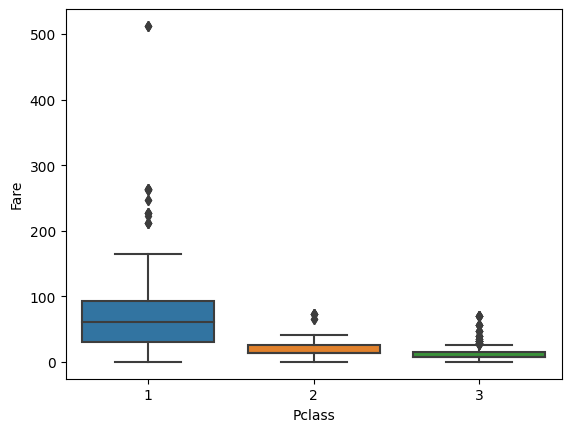

In [90]:
sns.boxplot(x='Pclass',y='Fare',data=data)

Wyraźna jest ujemna korelacja pomiędzy ceną biletu a klasą.\
W każdej z klas jest jednak grupa pasażerów, którzy zapłacili za bilet znacznie więcej niż inni pasażerowie tej klasy.\
Można podejrzewać, że poza klasą jeszcze inny parametr miał wpływ na cenę biletu.